# Compute Architecure - Assessment
**Course**: TU 2025 25-26: 8645 -- COMPUTER INFRASTRUCTURE  
**Lecturer**: Ian McLauglin  
**Author**: Clyde Watts  








### Imports

yfinance - financial ticker data from yahoo  - [yfinance](https://github.com/ranaroussi/yfinance)
datetime - pythons inbuild date time
logging - python logging
os - operating system functions
glob - file selector

In [43]:
import yfinance
import logging
from datetime import datetime, timedelta
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##  Initialisation

In [44]:
# init logging
logging.basicConfig(level=logging.INFO)

## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

## Problem 1: Requirements ##

### Extract ###

1.  Extract from yfinance data the stock data for META,AAPL,AMZN,NFLX,GOOG
2.  For 5 complete previous days , that is TODAY - 6 days to TODAY -1 day , exclude TODAY because it is not complete
3.  File format will YYYYMMDD-HHmmss.csv where YYYY - is 4 digit year , MM month 01-12 , DD - is 01-31. HH - hours , 24 our clock , mm - minutes 00-59 , seconds 00-59.
4.  Grain - Hour

Column
Date , <ticket> ( Open,High,Low,Close,Volume) ....
ticket is META , AAPL , AMZN , NFLX or GOOG
Open - open price
Close - close price
High - High pricr
Low - Low price
Volumn - Volume in period

The data frame return has an index on the date , and is a multilevel index. Level one is the ticket , and the second level is the metric - that is open , close , high , low prices and volume 
 

Question - What about Daylight saving time - over and under hour every size months

In [45]:
# prototype for extracting stock data
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
def get_data(tickers = tickers,start_date=None, end_date=None,interval="1h",data_path="./data/"):
    """
    Function to get stock data from yfinance

    Parameters:
    tickers (list): List of stock tickers to download data for
    start_date (str): Start date for data in format "YYYY-MM-DD". If None, defaults to 6 days ago.
    end_date (str): End date for data in format "YYYY-MM-DD". If None, defaults to yesterday.
    interval (str): Data interval. Default is "1h".
    data_path (str): Path to save the data. Default is "./data/".
    Returns:
    df_data (DataFrame): DataFrame containing the stock data
    file_name (str): Name of the file where data is saved
    """
    if start_date is None:
        start_date = (datetime.now() - timedelta(days=6)).strftime("%Y-%m-%d")
        # create file name based on current date and time
        file_name = f"{data_path}{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    else:
        # convert start_date to datetime object
        start_date_time = datetime.strptime(start_date, "%Y-%m-%d")
        # create file name based on start time and 23:59:59 of end date
        start_date_str = start_date_time.strftime("%Y%m%d") + "_235959"
        file_name = f"{data_path}{start_date_str}.csv"
    if end_date is None:
        end_date = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
    # check if directory exists
    if not os.path.exists(data_path):
        logging.info(f"Creating directory: {data_path}")
        os.makedirs(data_path)
    # if file exists then delete it
    if os.path.exists(file_name):
        logging.info(f"Deleting existing file: {file_name}")
        os.remove(file_name)
    logging.info(f"Start Date: {start_date}, End Date: {end_date}")
    df_data = yfinance.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
    # Save the data to a CSV file
    df_data.to_csv(file_name)
    return df_data
   



In [46]:
df = get_data(tickers=tickers)

INFO:root:Start Date: 2025-10-05, End Date: 2025-10-10
C:\Users\cw171001\AppData\Local\Temp\ipykernel_71248\2418543891.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yfinance.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

Requirements

1. Glob the data folder for YYYYMMDD_hhmmss.csv files. 
    1. We will glob the files looking for the pattern 20*.*csv
    1.

References

https://docs.python.org/3/library/glob.html


In [47]:
def get_the_latest_file(data_path="./data/"):
    """get_the_latest_file

    Args:
        data_path (str): The path to the directory containing the data files.

    Returns:
        str: The path to the latest data file, or None if no files are found.
    """

    logging.info(f"Getting the latest file from {data_path}")
    # File pattern
    file_pattern = "20[0-9][0-9][0-1][0-9][0-3][0-9]_[0-9][0-9][0-9][0-9][0-9][0-9].csv"
    # Add path to file pattern
    file_pattern = os.path.join(data_path, file_pattern)
    list_of_files = glob.glob(file_pattern) 
    if not list_of_files:
        logging.warning(f"No files found in {data_path} matching pattern {file_pattern}")
        return None
    latest_file = max(list_of_files, key=os.path.getctime)
    logging.info(f"Latest file: {latest_file}")
    return latest_file

### Load data from 

In [48]:
file = get_the_latest_file()
print(file)


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251011_110511.csv


./data\20251011_110511.csv


In [49]:
def load_file_into_dataframe(file):
    """load_file_into_dataframe

    Args:
        file (str): The path to the data file.

    Returns:
        pd.DataFrame: The data as a pandas DataFrame.
    """
    if file is None:
        logging.error("No file provided to load into dataframe.")
        return None
    df = pd.read_csv(file, header=[0,1], index_col=0, parse_dates=True)
    return df



In [50]:
file = get_the_latest_file()
df = load_file_into_dataframe(file)

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251011_110511.csv


### Investigate Data Frame

Have a look at the dataframe and see it's structure. 

https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

The index is DatetimeIndex - that is the timestamp of the price.
The data appears Company/Ticker - and then metrics - open,high,low,close,volume



In [51]:
# Have a look at the index and columns
print(" Data Frame Info")
print(df.info(verbose=True))
#print(df.columns)

 Data Frame Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2025-10-06 13:30:00+00:00 to 2025-10-09 19:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (META, Open)    28 non-null     float64
 1   (META, High)    28 non-null     float64
 2   (META, Low)     28 non-null     float64
 3   (META, Close)   28 non-null     float64
 4   (META, Volume)  28 non-null     int64  
 5   (NFLX, Open)    28 non-null     float64
 6   (NFLX, High)    28 non-null     float64
 7   (NFLX, Low)     28 non-null     float64
 8   (NFLX, Close)   28 non-null     float64
 9   (NFLX, Volume)  28 non-null     int64  
 10  (AAPL, Open)    28 non-null     float64
 11  (AAPL, High)    28 non-null     float64
 12  (AAPL, Low)     28 non-null     float64
 13  (AAPL, Close)   28 non-null     float64
 14  (AAPL, Volume)  28 non-null     int64  
 15  (GOOG, Open)    28 non-null     float64
 16  (GOOG, High)   

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251011_110511.csv
INFO:root:Loading data from file: ./data\20251011_110511.csv


The latest file name is: ./data\20251011_110511.csv
Filename only: 20251011_110511.csv
Filename without extension: 20251011_110511
PNG Filename: 20251011_110511.png
PNG File Path: ./data/20251011_110511.png


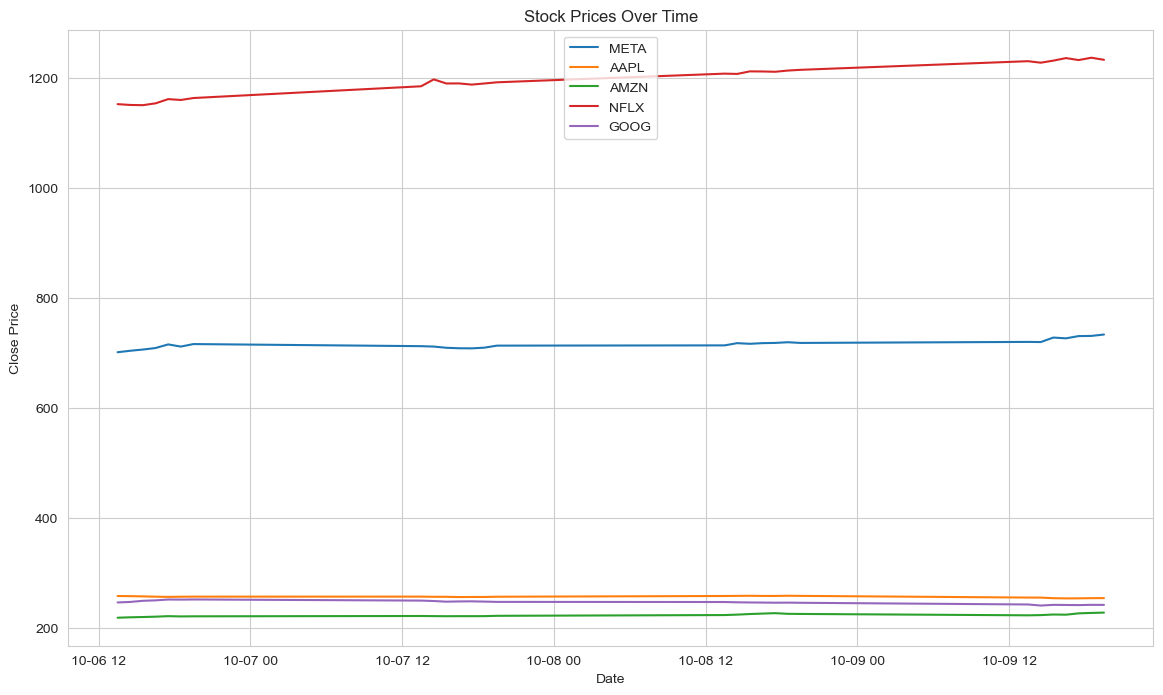

In [52]:
### Attempt to do plot and write to file

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
data_path = "./data/"
# create full path for png file
png_file_path = os.path.join(data_path, filename_png)
print("PNG File Path:", png_file_path)
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.legend()
#plt.show()
plt.savefig(png_file_path)

In [53]:
def plot_data(df, png_file_path):
    """plot_data

    Args:
        df (pd.DataFrame): The data as a pandas DataFrame.
        png_file_path (str): The path to save the plot image.

    Returns:
        None
    """
    if df is None or png_file_path is None:
        logging.error("DataFrame or PNG file path is None.")
        return
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.savefig(png_file_path)
    logging.info(f"Plot saved to {png_file_path}")

INFO:root:Plot saved to ./data/20251011_110511.png


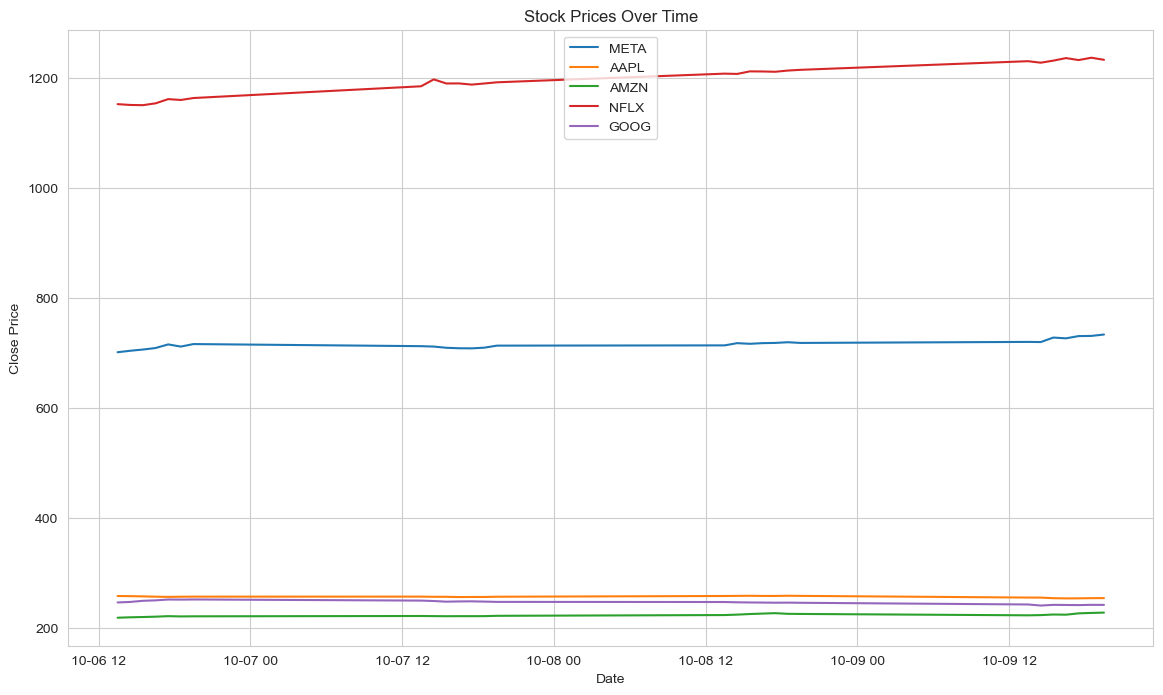

In [54]:
plot_data(df, png_file_path)
#------------------------------------------------------------------------------


Try alternatives to plotting data 


In [55]:

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
df

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251011_110511.csv
INFO:root:Loading data from file: ./data\20251011_110511.csv


The latest file name is: ./data\20251011_110511.csv
Filename only: 20251011_110511.csv
Filename without extension: 20251011_110511
PNG Filename: 20251011_110511.png


Ticker                           META                                      \
Price                            Open        High         Low       Close   
Datetime                                                                    
2025-10-06 13:30:00+00:00  705.000000  706.619995  690.659973  700.933594   
2025-10-06 14:30:00+00:00  701.260010  706.116699  699.000000  703.590027   
2025-10-06 15:30:00+00:00  703.659973  708.030029  703.159973  705.799988   
2025-10-06 16:30:00+00:00  705.785583  709.950012  705.520020  708.565125   
2025-10-06 17:30:00+00:00  708.537415  716.690002  707.320007  715.119995   
2025-10-06 18:30:00+00:00  715.061218  716.880005  711.030029  711.200012   
2025-10-06 19:30:00+00:00  711.119995  715.830017  711.099976  715.750000   
2025-10-07 13:30:00+00:00  716.979980  718.499878  708.260010  711.940002   
2025-10-07 14:30:00+00:00  711.869995  715.650024  709.730103  711.200012   
2025-10-07 15:30:00+00:00  711.054993  711.250000  707.710022  709.000000   
2025-10-07 16:30:00+00:00  709.000000  710.426514  705.750000  708.140015   
2025-10-07 17:30:00+00:00  708.130005  708.820007  707.020020  707.954224   
2025-10-07 18:30:00+00:00  707.905029  710.349976  707.844971  709.200012   
2025-10-07 19:30:00+00:00  709.280029  714.000000  709.280029  712.919983   
2025-10-08 13:30:00+00:00  713.510010  716.309998  707.809998  713.375000   
2025-10-08 14:30:00+00:00  713.559998  718.249878  713.409973  717.429993   
2025-10-08 15:30:00+00:00  717.395020  718.369995  715.000000  716.232178   
2025-10-08 16:30:00+00:00  716.080017  717.609924  714.460022  717.434875   
2025-10-08 17:30:00+00:00  717.570007  719.650024  717.210022  717.840027   
2025-10-08 18:30:00+00:00  717.885010  719.440002  716.710022  719.090027   
2025-10-08 19:30:00+00:00  719.119995  719.409912  716.630005  717.830017   
2025-10-09 13:30:00+00:00  718.539978  719.989990  713.270020  719.690002   
2025-10-09 14:30:00+00:00  717.519897  719.820007  717.010010  719.403198   
2025-10-09 15:30:00+00:00  723.549988  728.797974  723.169983  727.580017   
2025-10-09 16:30:00+00:00  726.575012  727.385010  724.900085  726.179993   
2025-10-09 17:30:00+00:00  727.629517  730.476013  727.401978  730.280029   
2025-10-09 18:30:00+00:00  729.099792  732.349976  728.989990  730.570129   
2025-10-09 19:30:00+00:00  731.825012  733.239990  731.825012  733.119995   

Ticker                                     NFLX                            \
Price                       Volume         Open         High          Low   
Datetime                                                                    
2025-10-06 13:30:00+00:00  7964634  1160.369995  1162.119995  1150.500000   
2025-10-06 14:30:00+00:00  2664362  1151.099976  1153.145020  1145.479980   
2025-10-06 15:30:00+00:00  1677535  1150.415039  1153.439941  1146.989990   
2025-10-06 16:30:00+00:00  1489886  1150.622559  1154.219971  1148.987549   
2025-10-06 17:30:00+00:00  2070174  1153.089966  1161.979980  1152.994995   
2025-10-06 18:30:00+00:00  1872354  1161.250000  1163.484985  1159.000000   
2025-10-06 19:30:00+00:00  1909072  1159.469971  1163.579956  1157.538940   
2025-10-07 13:30:00+00:00  3135854  1177.790039  1189.349976  1177.790039   
2025-10-07 14:30:00+00:00  2169165  1184.329956  1201.364990  1184.026001   
2025-10-07 15:30:00+00:00  1209590  1197.359985  1197.359985  1188.310059   
2025-10-07 16:30:00+00:00  1814891  1189.239990  1190.839844  1183.000000   
2025-10-07 17:30:00+00:00   768212  1189.349976  1190.810059  1186.739990   
2025-10-07 18:30:00+00:00   659199  1187.568848  1193.489990  1186.609985   
2025-10-07 19:30:00+00:00  1252769  1189.990967  1194.050049  1189.109985   
2025-10-08 13:30:00+00:00  2928898  1197.109985  1210.780029  1192.000000   
2025-10-08 14:30:00+00:00  1301633  1207.517456  1209.500000  1201.469971   
2025-10-08 15:30:00+00:00   906102  1207.469971  1213.459961  1206.520142   
2025-10-08 16:30:00+00:00   865509  1211.280029  1212.819946  1209.53002

PNG File Path: ./data/20251011_110511.png


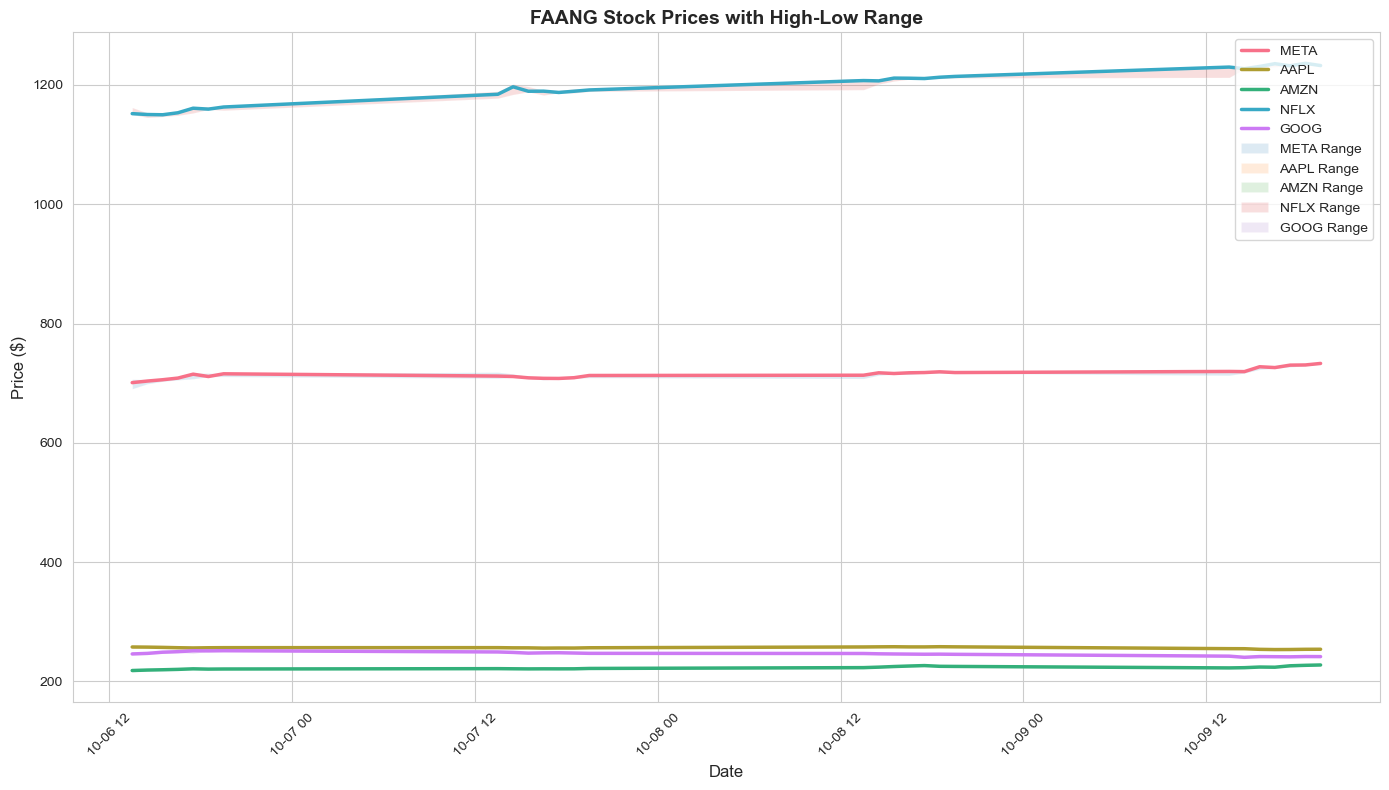

In [56]:
print("PNG File Path:", png_file_path)

# Prepare data for seaborn plotting - reshape for long format
plot_data = []
for ticker in tickers:
    ticker_data = pd.DataFrame({
        'Date': df.index,
        'Close': df[(ticker, 'Close')].values,
        'High': df[(ticker, 'High')].values,
        'Low': df[(ticker, 'Low')].values,
        'Ticker': ticker
    })
    plot_data.append(ticker_data)

# Combine all ticker data
combined_data = pd.concat(plot_data, ignore_index=True)

# Create seaborn plot with proper styling
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot close prices using seaborn
sns.lineplot(data=combined_data, x='Date', y='Close', hue='Ticker', 
             palette='husl', linewidth=2.5)

# Add shaded areas for high-low ranges
for ticker in tickers:
    ticker_subset = combined_data[combined_data['Ticker'] == ticker]
    plt.fill_between(ticker_subset['Date'], 
                     ticker_subset['High'], 
                     ticker_subset['Low'], 
                     alpha=0.15, 
                     label=f'{ticker} Range')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('FAANG Stock Prices with High-Low Range', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig(png_file_path, dpi=300, bbox_inches='tight')

In [67]:
# Data is already in the right format - combined_data has Date, Close, High, Low, Ticker
# Now normalize the price data to 0-1 range for each ticker individually
normalized_data = combined_data.copy()

# Normalize each ticker separately
for ticker in tickers:
    ticker_mask = normalized_data['Ticker'] == ticker
    for column in ['Close', 'High', 'Low']:
        ticker_values = normalized_data.loc[ticker_mask, column]
        min_val = ticker_values.min()
        max_val = ticker_values.max()
        normalized_data.loc[ticker_mask, column] = (ticker_values - min_val) / (max_val - min_val)

print("Normalized data (first 10 rows):")
print(normalized_data.head(10))

Normalized data (first 10 rows):
                       Date     Close      High       Low Ticker
0 2025-10-06 13:30:00+00:00  0.000000  0.018556  0.000000   META
1 2025-10-06 14:30:00+00:00  0.082533  0.000000  0.202600   META
2 2025-10-06 15:30:00+00:00  0.151194  0.070542  0.303656   META
3 2025-10-06 16:30:00+00:00  0.237104  0.141329  0.360987   META
4 2025-10-06 17:30:00+00:00  0.440758  0.389824  0.404713   META
5 2025-10-06 18:30:00+00:00  0.318968  0.396829  0.494839   META
6 2025-10-06 19:30:00+00:00  0.460331  0.358117  0.496538   META
7 2025-10-07 13:30:00+00:00  0.341958  0.456551  0.427548   META
8 2025-10-07 14:30:00+00:00  0.318968  0.351481  0.463260   META
9 2025-10-07 15:30:00+00:00  0.250615  0.189258  0.414188   META


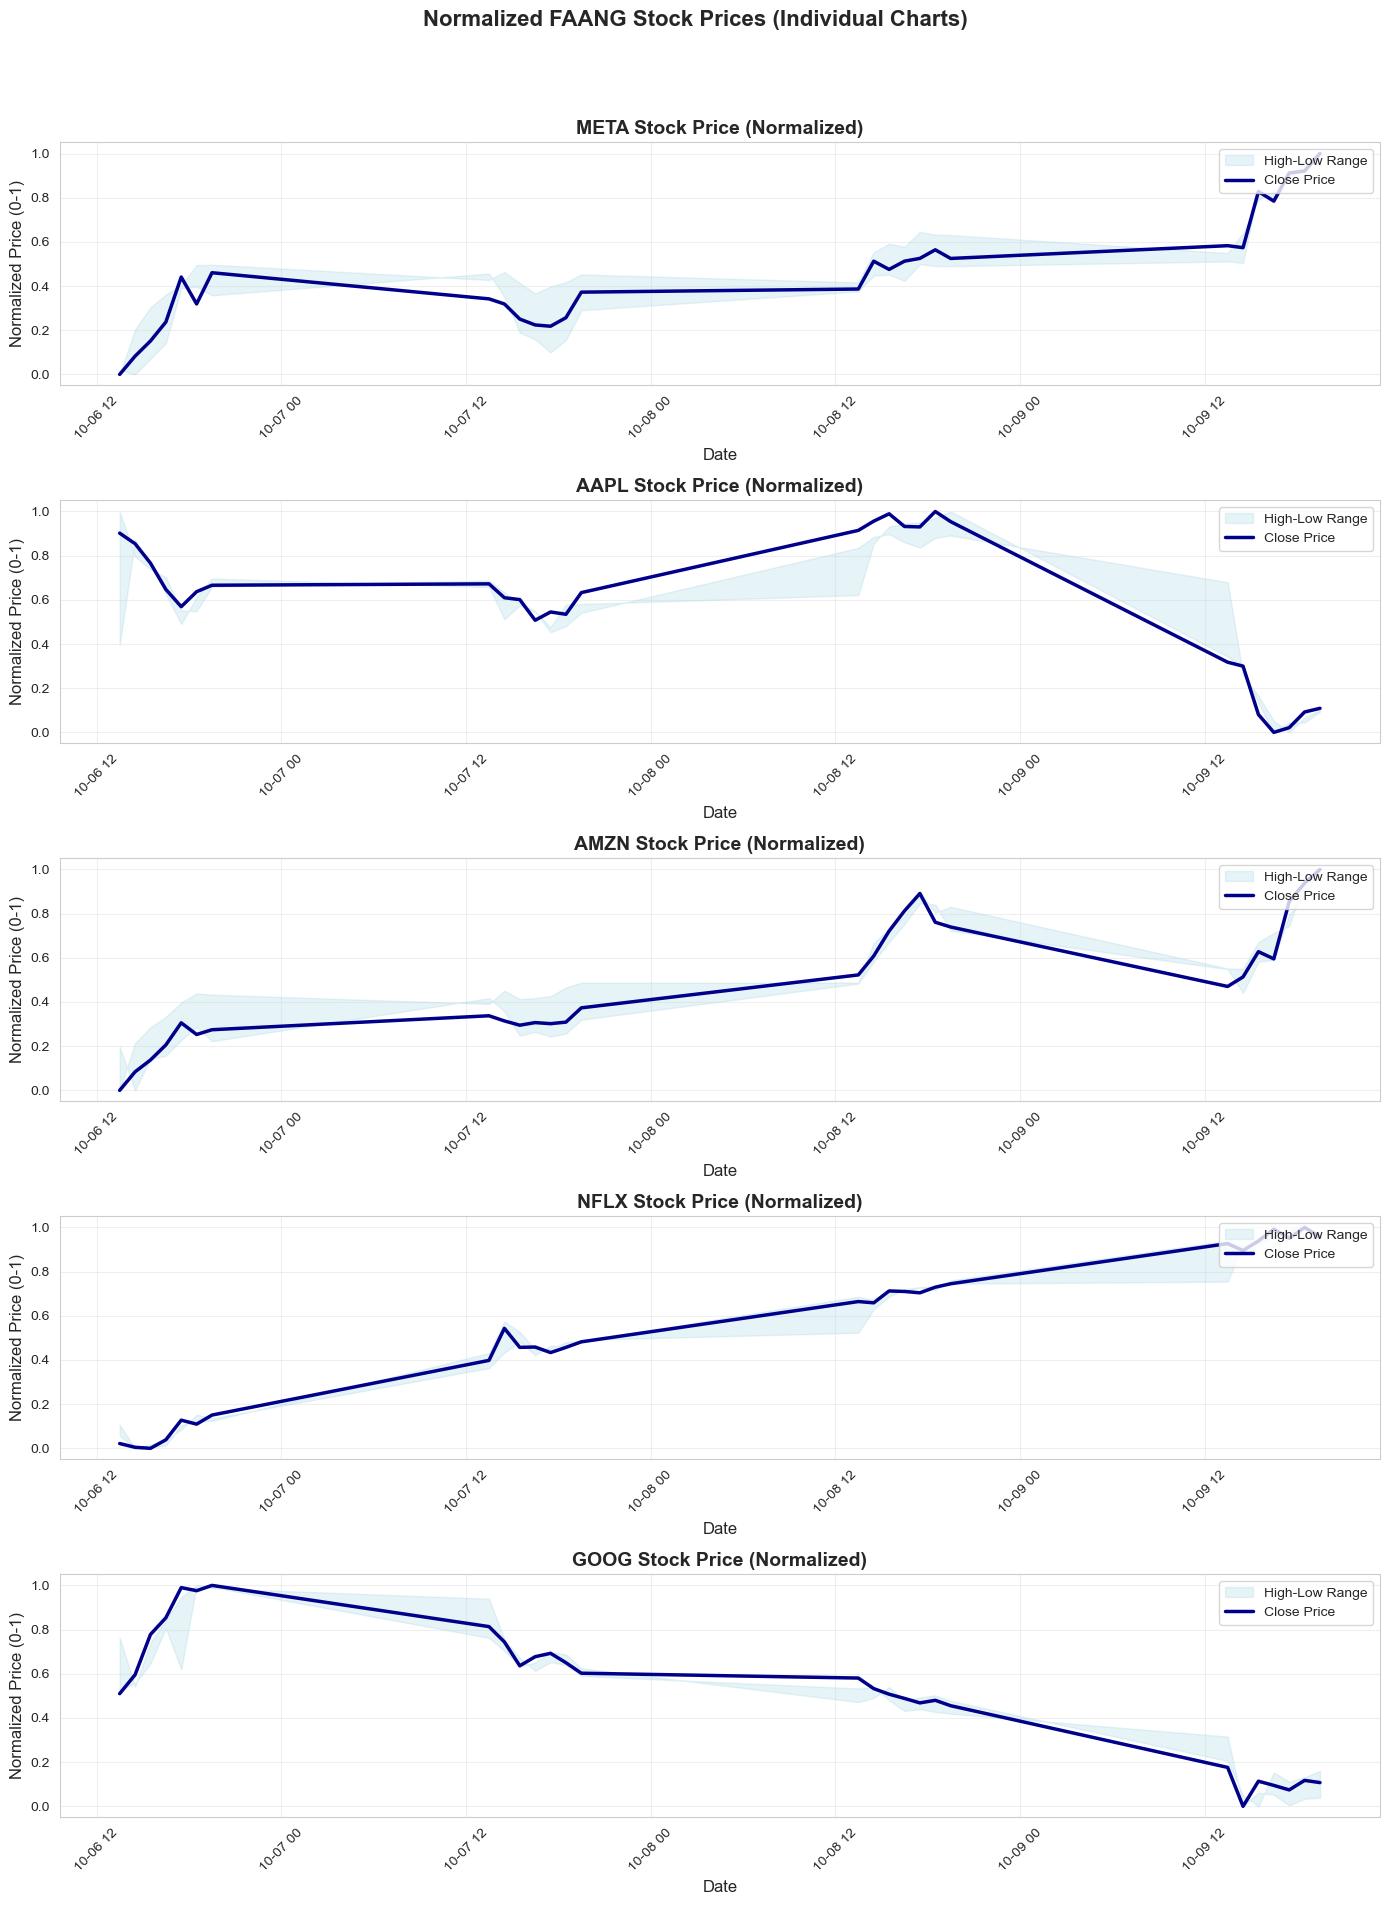

Normalized individual plots saved to: ./data/20251011_110511_normalized_individual.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# Create separate plots for each ticker using normalized data
# Note: This was all done using vibe coding using vscode and github copilot
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 4 * len(tickers)))
fig.suptitle('Normalized FAANG Stock Prices (Individual Charts)', fontsize=16, fontweight='bold', y=0.98)

for i, ticker in enumerate(tickers):
    # Filter data for current ticker
    ticker_data = normalized_data[normalized_data['Ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    
    ax = axes[i]
    
    # Plot shaded area between high and low
    ax.fill_between(ticker_data['Date'], 
                   ticker_data['High'], 
                   ticker_data['Low'], 
                   alpha=0.3, 
                   color='lightblue',
                   label='High-Low Range')
    
    # Plot close price line
    sns.lineplot(data=ticker_data, x='Date', y='Close', 
                ax=ax, color='darkblue', linewidth=2.5, label='Close Price')
    
    ax.set_title(f'{ticker} Stock Price (Normalized)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Normalized Price (0-1)', fontsize=12)
    ax.legend(loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the plot
normalized_png_path = png_file_path.replace('.png', '_normalized_individual.png')
plt.savefig(normalized_png_path, dpi=300, bbox_inches='tight')
print(f"Normalized individual plots saved to: {normalized_png_path}")